## NN Design Tips and Visualization

In [8]:
#!pip install -U tensorflow

  Using cached tensorflow-2.12.0-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (585.9 MB)


In [1]:
import tensorflow as tf
from tensorflow import keras
tf.__version__

2023-03-30 18:29:05.370973: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-03-30 18:29:05.427037: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-03-30 18:29:05.427759: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-30 18:29:06.294822: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


'2.12.0'

In [2]:
import sklearn.datasets as ds
from sklearn.model_selection import train_test_split

breast_ds = ds.load_breast_cancer()
print(dir(breast_ds))
print(breast_ds['DESCR'])


X = breast_ds.data
y = 1 - breast_ds.target
print('size of the feature vectors:', X.shape)
print('size of y:', y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
print('size of the training set:', y_train.shape)
print('size of the test set:', y_test.shape)

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names']
.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features we

### NN design tips: 
- if get low training and validation accuray, this is because of underfitting and you can increase the number of hidden nodes/layers
- if get high training accuray and low validation accuracy, you can consider reduce the number of hidden nodes and apply early stopping strategy.

In [3]:
### 4.1 create and train NNs

# practice different configurations of the network, and 
# check the differences in the results
## 1): 5 hidden units for h1, and 5 units for h2 
## 2): 10 hidden units for h1, and 5 units for h2
## 3): 30 hidden units for h1, and 10 units for h2


model2 = keras.models.Sequential() # an empty model
model2.add(keras.layers.Dense(units=5,     
                              input_dim=30,# 
                              activation = 'relu'))  # h1

model2.add(keras.layers.Dense(units=10,     
                              activation = 'relu'))  # h2

model2.add(keras.layers.Dense(units=2,
                              activation='softmax'))  # output  layer

# optimizer = keras.optimizers.SGD(learning_rate=0.0001)
optimizer = keras.optimizers.Adam(learning_rate=0.0001)
model2.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model2.summary()

# prepare one-hot vectors
y_train_onehot = keras.utils.to_categorical(y_train)

# After class practice: train the model and report the test accuracy
# train the model
h = model2.fit(X_train, y_train_onehot, 
               batch_size = 16,
               epochs = 300,
               validation_split = 0.2,
               verbose = 1)


# evaluate the model
import numpy as np
y_train_pred = np.argmax(model2.predict(X_train), axis=-1)
train_acc = sum(y_train == y_train_pred)/y_train.shape[0]

y_test_pred = np.argmax(model2.predict(X_test), axis=-1)
test_acc = sum(y_test == y_test_pred)/y_test.shape[0]

print('training acc is', train_acc)
print('test acc is', test_acc)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 155       
                                                                 
 dense_1 (Dense)             (None, 10)                60        
                                                                 
 dense_2 (Dense)             (None, 2)                 22        
                                                                 
Total params: 237
Trainable params: 237
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300


2023-03-30 18:29:12.644370: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-03-30 18:29:12.644894: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


23/23 [==============================] - 1s 10ms/step - loss: 89.1272 - accuracy: 0.6099 - val_loss: 58.1703 - val_accuracy: 0.7143
Epoch 2/300
23/23 [==============================] - 0s 2ms/step - loss: 86.1793 - accuracy: 0.6099 - val_loss: 56.2783 - val_accuracy: 0.7143
Epoch 3/300
23/23 [==============================] - 0s 3ms/step - loss: 83.3758 - accuracy: 0.6099 - val_loss: 54.3800 - val_accuracy: 0.7143
Epoch 4/300
23/23 [==============================] - 0s 2ms/step - loss: 80.6040 - accuracy: 0.6099 - val_loss: 52.5729 - val_accuracy: 0.7143
Epoch 5/300
23/23 [==============================] - 0s 2ms/step - loss: 77.8681 - accuracy: 0.6099 - val_loss: 50.8286 - val_accuracy: 0.7143
Epoch 6/300
23/23 [==============================] - 0s 2ms/step - loss: 75.2954 - accuracy: 0.6099 - val_loss: 49.0143 - val_accuracy: 0.7143
Epoch 7/300
23/23 [==============================] - 0s 3ms/step - loss: 72.6462 - accuracy: 0.6099 - val_loss: 47.3789 - val_accuracy: 0.7143
Epoch 8/30

#### Visualize h.history

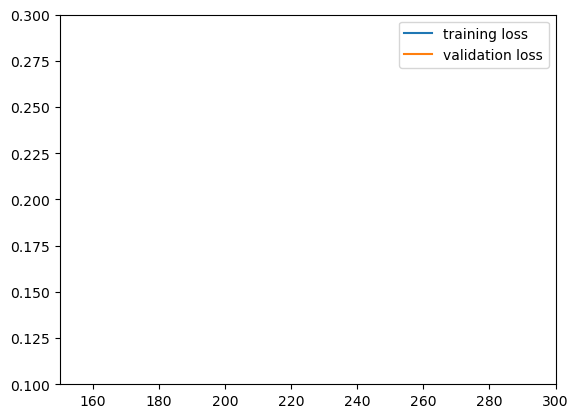

In [5]:
import matplotlib.pyplot as plt
plt.plot(h.history['loss'], label = 'training loss')
plt.plot(h.history['val_loss'], label = 'validation loss')
plt.ylim(0.1, 0.3)
plt.xlim(150, 300)
plt.legend()

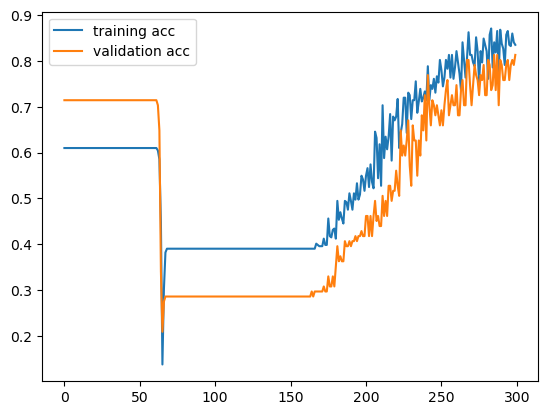

In [6]:
import matplotlib.pyplot as plt
plt.plot(h.history['accuracy'], label = 'training acc')
plt.plot(h.history['val_accuracy'], label = 'validation acc')
plt.legend()

#### Early stopping

In [7]:
# this model is trained based on the previous 20-epochs training
early_stopping = keras.callbacks.EarlyStopping(
    monitor='accuracy', patience=10, start_from_epoch=50
)
h1 = model2.fit(X_train, y_train_onehot, 
           batch_size = 16,
           epochs = 500, # very large # epochs
           validation_split = 0.2,
           callbacks = [early_stopping],
           verbose = 1)

Epoch 1/500
23/23 [==============================] - 0s 4ms/step - loss: 0.5080 - accuracy: 0.8709 - val_loss: 0.5585 - val_accuracy: 0.8242
Epoch 2/500
23/23 [==============================] - 0s 2ms/step - loss: 0.5078 - accuracy: 0.8819 - val_loss: 0.5647 - val_accuracy: 0.8462
Epoch 3/500
23/23 [==============================] - 0s 3ms/step - loss: 0.5071 - accuracy: 0.8819 - val_loss: 0.5593 - val_accuracy: 0.8462
Epoch 4/500
23/23 [==============================] - 0s 2ms/step - loss: 0.5088 - accuracy: 0.8324 - val_loss: 0.5536 - val_accuracy: 0.8352
Epoch 5/500
23/23 [==============================] - 0s 2ms/step - loss: 0.5071 - accuracy: 0.8901 - val_loss: 0.5580 - val_accuracy: 0.8462
Epoch 6/500
23/23 [==============================] - 0s 2ms/step - loss: 0.5053 - accuracy: 0.8544 - val_loss: 0.5604 - val_accuracy: 0.8462
Epoch 7/500
23/23 [==============================] - 0s 2ms/step - loss: 0.5038 - accuracy: 0.8846 - val_loss: 0.5534 - val_accuracy: 0.8242
Epoch 8/500
2